# Lesson 1: Cats and Dogs

In [14]:
%matplotlib inline

In [3]:
# set path. let's use sample
path = "data/dogs-vs-cats-redux-kernels-edition"
#path = "data/dogscats/sample"

In [ ]:
import os, json
import numpy as np
import utils; reload(utils)
from utils import plots

In [5]:
import vgg16

In [6]:
vgg = vgg16.Vgg16()


In [12]:
batch_size = 64

In [8]:
batches = vgg.get_batches(path+'/train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'/valid', batch_size=batch_size)

Found 22998 images belonging to 2 classes.
Found 2002 images belonging to 2 classes.


In [9]:
vgg.finetune(batches)

In [10]:
no_of_epochs = 10
for epoch in range(no_of_epochs):
    print "Running epoch: %d" % epoch
    vgg.fit(batches=batches, val_batches=val_batches, nb_epoch=1)
    last_weights_filename = 'cats-dogs-model-ft%d.h5' % epoch
    vgg.model.save_weights(path + '/results/' + last_weights_filename)
print "Completed %s fit operations" % no_of_epochs


Running epoch: 0
Epoch 1/1
22998/22998 [==============================] - 532s - loss: 0.1234 - acc: 0.9643 - val_loss: 0.0655 - val_acc: 0.9840
Running epoch: 1
Epoch 1/1
22998/22998 [==============================] - 532s - loss: 0.0778 - acc: 0.9787 - val_loss: 0.0721 - val_acc: 0.9795
Running epoch: 2
Epoch 1/1
22998/22998 [==============================] - 532s - loss: 0.0779 - acc: 0.9781 - val_loss: 0.0590 - val_acc: 0.9865
Running epoch: 3
Epoch 1/1
22998/22998 [==============================] - 532s - loss: 0.0848 - acc: 0.9787 - val_loss: 0.0814 - val_acc: 0.9795
Running epoch: 4
Epoch 1/1
22998/22998 [==============================] - 532s - loss: 0.0761 - acc: 0.9804 - val_loss: 0.0545 - val_acc: 0.9865
Running epoch: 5
Epoch 1/1
22998/22998 [==============================] - 533s - loss: 0.0803 - acc: 0.9800 - val_loss: 0.0662 - val_acc: 0.9865
Running epoch: 6
Epoch 1/1
22998/22998 [==============================] - 533s - loss: 0.0774 - acc: 0.9810 - val_loss: 0.0582 - v

In [15]:
test_batches, predictions = vgg.test(path+'/test', batch_size=batch_size*2)

Found 12500 images belonging to 1 classes.


In [16]:
filenames = test_batches.filenames

In [17]:
predcs = predictions[:5]
labels = filenames[:5]
#plots(imgs, titles=labels)
print labels
print predcs

['unknown/12470.jpg', 'unknown/12387.jpg', 'unknown/2227.jpg', 'unknown/3479.jpg', 'unknown/8584.jpg']
[[  3.1768e-13   1.0000e+00]
 [  1.0000e+00   2.1693e-12]
 [  1.0000e+00   3.7846e-06]
 [  1.4917e-15   1.0000e+00]
 [  1.0000e+00   2.1046e-11]]


cat: 0.000000
dog: 1.000000


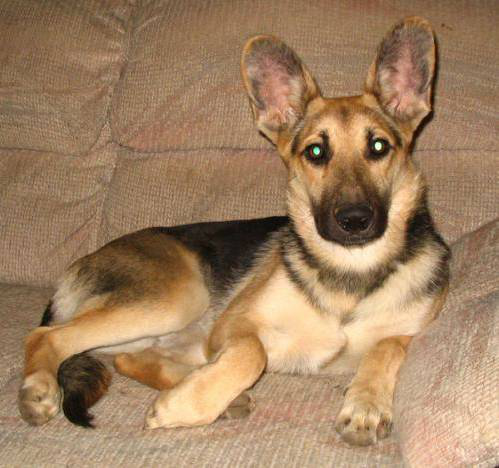

In [18]:
from PIL import Image
current_image = 820
print ('cat: %2f' % predictions[current_image][0])
print ('dog: %2f' % predictions[current_image][1])
Image.open(path+'/test/' + filenames[current_image])

In [19]:
#Save our test results arrays so we can use them again later
utils.save_array(path + '/results/' + 'test_preds-10-epoch.dat', predictions)
utils.save_array(path + '/results/' + 'filenames-10-epoch.dat', filenames)

In [41]:
#save weight
latest_weights_filename = 'cats-dogs-%d.h5' % 1 # epoch id
vgg.model.save_weights(path + '/results/'+latest_weights_filename)


In [24]:
isDogRaw = predictions[:,1]
isDog = isDogRaw.clip(min=0.05, max=0.95)

In [25]:
ids = map(lambda f: int(f[8:-4]), filenames)

In [26]:
submission = np.stack([ids,isDog], axis=1)

In [27]:
submission_file_name = 'submission3-10epoch-clip.csv'
np.savetxt(path + '/results/' + submission_file_name, submission, fmt='%d,%.5f', header='id,label', comments='')